## Monte Carlo method

integration of an function with values $f(x) \in [m,n]$ on an intervall $x \in [a,b]$ can be performed by picking random samples inside this domain. By multiplying the area of the domain with the percentage of samples lying under the graph we get a numerical estimate of the integration value.

\begin{align}
\int_a^b f(x) dx =  \underbrace{ (n-m) \cdot (b-a) }_{Area} \cdot \frac{N_{\text{below }f(x)}}{N}
\end{align}


In [6]:
#monte carlo with random samples from integration domain
import numpy as np
import matplotlib.pyplot as plt

xa=0;xb=1
ya=0;yb=1
area = (xb-xa)*(yb-ya)
N=10000
f = lambda x: np.sqrt(1-x**2)

x = np.random.rand(N)*(1/(xb-xa))+xa
y = np.random.rand(N)*(1/(yb-ya))+ya

n_above = 0
n_below = 0
x_above = list()
y_above = list()
x_below = list()
y_below = list()
for n in range(N):
    if y[n]<f(x[n]):
        n_below += 1
        x_below.append(x[n])
        y_below.append(y[n])
    else:
        n_above += 1
        x_above.append(x[n])
        y_above.append(y[n])

result = area*n_below/N
print('integral solution: ', result)
print('pi: ',result*4)

integral solution:  0.7878
pi:  3.1512


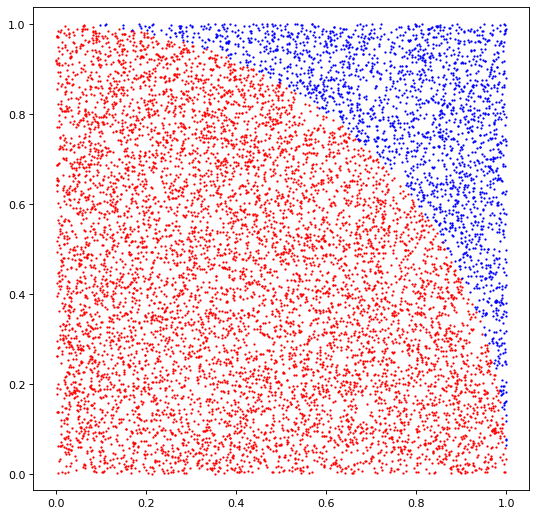

In [8]:
fig = plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x_below,y_below,s=1,color='red')
plt.scatter(x_above,y_above,s=1,color='blue')
plt.axis('equal')
plt.show()

## Monte Carlo Integration

An alternative is to compute the average of $f(x)$ and multiply by the interval width $x \in [a,b]$.

\begin{align}
\int_a^b f(x) dx = \frac{(b-a)}{N} \cdot \sum_{i=0}^{N-1} f(x_i)
\end{align}


In [3]:
#monte carlo with random samples from function
import numpy as np
import matplotlib.pyplot as plt

xa=0;xb=1
ya=0;yb=1
interval = (xb-xa)
N=100
f = lambda x: np.sqrt(1-x**2)

x = np.random.rand(N)*(1/(xb-xa))+xa
values = f(x)

result = interval*sum(values)/N
print('integral solution: ', result)
print('pi: ',result*4)

integral solution:  0.8139620910230441
pi:  3.2558483640921763


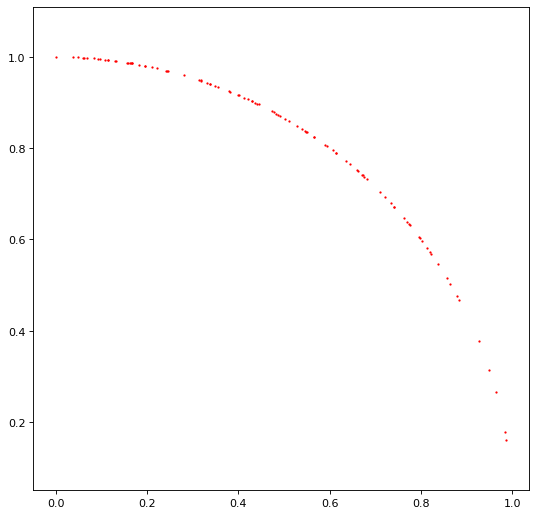

In [4]:
fig = plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x,values,s=1,color='red')
plt.axis('equal')
plt.show()

## Advanced Monte Carlo Integration

If we choose the samples not randomly, but according to a probability distribution $p(x)$, the integration becomes:

\begin{align}
\int_a^b f(x) dx = \frac{1}{N} \cdot \sum_{i=0}^{N-1}  \frac{f(x_i)}{p(x_i)}
\end{align}

This equation resembles the principle, that areas where $p(x)$ samples are taken each sample has a weight of $\frac{1}{p(x)}$ to balance the weight of each separate area.

Additionaly one can partition the domain of integration into subsets and take equal samples on each one to reduce peak noise (stratified sampling).


## example: rendering equation

The rendering equation is used to compute the radiance (light intensity) $L(\vec{x},\vec{x}')$ coming from point $\vec{x}'$ and hitting point $\vec{x}$.
This is done by summing up (integration) of all the the radiances $L(\vec{x}',\vec{x}'')$ (on a hemisphere around $\vec{x}'$) coming from points $\vec{x}''$ and weigthing them with $\cos(\theta)= \vec{n}_{x'} \cdot (\vec{x}'' - \vec{x}')$ (radiance reduced by hitting surface at $\vec{x}'$ at an angle = light spreading) and the BRDF (bidirectional reflectance distribution function) $f(\vec{x},\vec{x}')$ (emission distribution from $\vec{x}'$ dependent on material properties):

\begin{align}
L(\vec{x},\vec{x}') = \underbrace{ L_e(\vec{x},\vec{x}') }_{\text{emission}} + \int_{0}^{\pi/2} \int_{0}^{2\pi} \underbrace{ f(\vec{x},\vec{x}',\vec{x}'')}_{\text{BRDF}} \underbrace{L(\vec{x}',\vec{x}'')}_{\text{incident light rays}} \underbrace{ \cos(\theta) }_{\text{angle of L hitting $\vec{x}'$}} d\varphi d\theta
\end{align}

Practically it's impossible to determine the full radiance $L(\vec{x}',\vec{x}'')$. For this reason it is approximated by sampling random points on a half-sphere around $\vec{x}_0$ and using Monte Carlo integration to compute the integral.
Let's use a simple example: no light emission ($L_e=0$), diffuse lighting (BRDF=$\frac{c}{\pi}$,$c \in [0,1]$)

\begin{align}
L(\vec{x},\vec{x}') &= \frac{c}{\pi} \int_{0}^{\pi/2} \int_{0}^{2\pi} L(\vec{x}',\vec{x}'') \cos(\theta) d\varphi d\theta \\
&= \frac{c}{\pi N} \cdot \sum_{i=0}^{N-1} \frac{L(\vec{x}',\vec{x}'')\cos(\theta)}{p(\vec{x}'')}
\end{align}

Instead of random samples $p(x)=\frac{1}{2\pi}$ we can sample with a distribution $p(x_i)=\frac{cos(\theta)}{2\pi}$, wich simplifies our calculation and also reduces the number of samples at $\theta \approx \pi/2$ wich do not contribute much to the overall radiance.

\begin{align}
L(\vec{x},\vec{x}') &= \frac{2 c}{N} \cdot \sum_{i=0}^{N-1} L(\vec{x}',\vec{x}'')
\end{align}
